In [4]:
# standart imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    in classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [12]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid = {'n_estimators': [25],
          'max_depth': [None, 90],
          'max_features': ['sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [20]} 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Shuffle the data
# frac=1 -> 100% of data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
#  “n_jobs” to -1 when using a CPU and 1 when using a GPU
clf = RandomForestClassifier(n_jobs=1)

# setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out results

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 700 candidates, totalling 3500 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_es

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, 

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=No

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=No

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=No

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=No

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=s

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=s

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=16, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=s

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=s

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=s

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=s

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=60, max_features=sqr

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=60, max_features=sqr

[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_sa

[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=90, max_features=sqrt, min_s

[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt

[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=90, max_features=sqr

[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt

[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt

[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqr

[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sq

[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=200, max_featu

[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=200, max

[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=200, max_fea

[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_feat

[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=200, max_feat

[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqr

[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=500, max_features=sq

[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqr

[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_fe

[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=500, 

[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=500, max_f

[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=500, max_feat

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_fea

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_fe

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=1200,

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1200

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=25; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=1200,

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=120

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_dep

In [14]:
gs_clf.best_params_

{'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'n_estimators': 25}

In [15]:
gs_y_preds = gs_clf.predict(X_test)
# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.85
Recall: 0.85
F1 score: 0.85


**USE PIPELINE, PUT ALL IN ONE CELL**

In [16]:
# data ready
import pandas as pd
from sklearn.pipeline import Pipeline
# modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# random seed
import numpy as np

np.random.seed(42)

# import data
heart_disease = pd.read_csv('data/heart-disease.csv')
# Shuffle the data
# frac=1 -> 100% of data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Instatiate RandomForestClassifier
#  “n_jobs” to -1 when using a CPU and 1 when using a GPU
model = Pipeline(steps=[
    ("model", RandomForestClassifier(n_jobs=-1))
])

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

#### `GridSearchCV` with Pipeline

In [30]:
pipe_grid = {
    "model__n_estimators": [10],
    "model__max_depth": [None, 90],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2],
    "model__min_samples_leaf": [20]
}

In [31]:
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=20, model__min_samples_split=2, model__n_estimators=10; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=20, model__min_samples_split=2, model__n_estimators=10; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=20, model__min_samples_split=2, model__n_estimators=10; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=20, model__min_samples_split=2, model__n_estimators=10; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=20, model__min_samples_split=2, model__n_estimators=10; total time=   0.1s
[CV] END model__max_depth=90, model__max_features=sqrt, model__min_samples_leaf=20, model__min_samples_split=2, model__n_estimators=10; total time=   0.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 90],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [20],
                         'model__min_samples_split': [2],
                         'model__n_estimators': [10]},
             verbose=2)

In [32]:
gs_model.best_params_

{'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 20,
 'model__min_samples_split': 2,
 'model__n_estimators': 10}

In [33]:
gs_model.score(X_test, y_test)

0.8852459016393442

In [34]:
gs_model_preds = gs_model.predict(X_test)
gs_model_metrics = evaluate_preds(y_test, gs_model_preds)

Acc: 88.52%
Precision: 0.91
Recall: 0.88
F1 score: 0.89


In [37]:
plot_compare = pd.DataFrame({'true':y_test, 'preds':gs_model_preds})
plot_compare

,true,preds
110,1,1
270,0,0
273,0,0
99,1,1
194,0,1
...,...,...
207,0,0
268,0,0
238,0,0
302,0,1


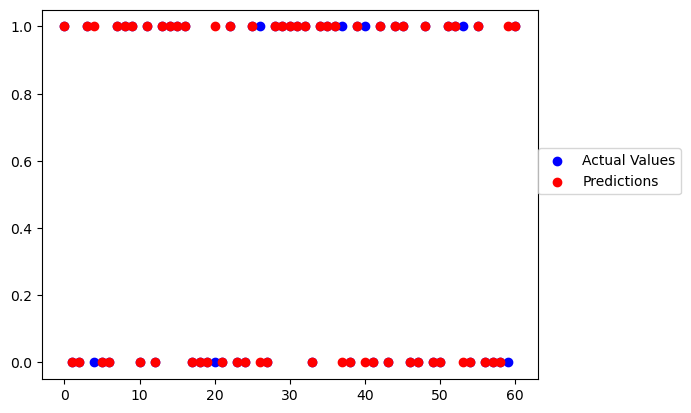

In [38]:
fig, ax = plt.subplots()
x = np.arange(0, len(plot_compare), 1)
ax.scatter(x, plot_compare["true"], c='b', label="Actual Values")
ax.scatter(x, plot_compare["preds"], c='r', label='Predictions')
ax.legend(loc=(1, 0.5));